## Gráficos en Python con Matplotlib y Seaborn

In [4]:
# Importo librerías para todos los gráficos
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

### Caso 1

In [6]:
# Importo dataset que contiene horas de uso de una plataforma y muestro los 5 primeros elementos
df_video = pd.read_csv("videoconferencia.csv", sep=",")
df_video.head()

,Semana,Día,Horas
0,Semana 01,Lunes,1873263
1,Semana 01,Martes,908249
2,Semana 01,Miércoles,1717158
3,Semana 01,Jueves,1873263
4,Semana 01,Viernes,908249


In [7]:
# Transformo los datos en una matriz para generar un mapa de calor
df_video = df_video.pivot(index="Semana", columns="Día", values="Horas")
df_video = df_video.loc[:,["Lunes","Martes","Miércoles","Jueves","Viernes","Sábado","Domingo"]]
df_video = df_video.transpose()

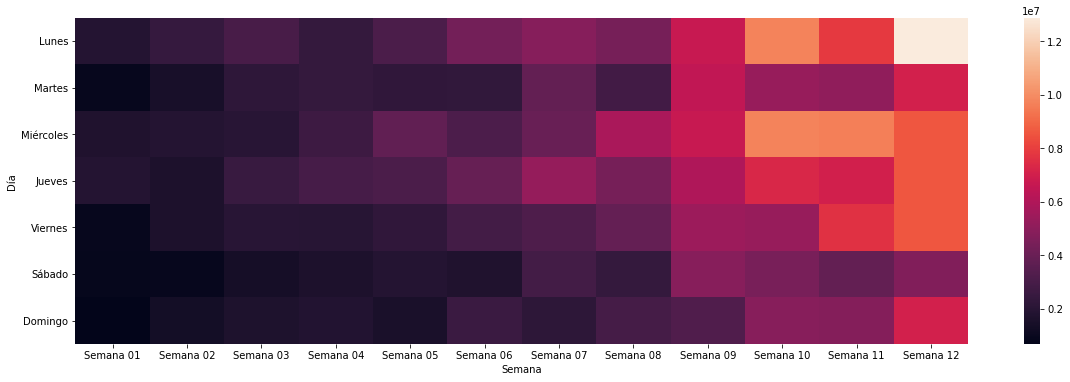

In [8]:
# Genero un mapa de calor con Seaborn a partir de la matriz anterior
plt.rcParams['figure.figsize'] = (20.0, 6.0)
ax = sns.heatmap(df_video)

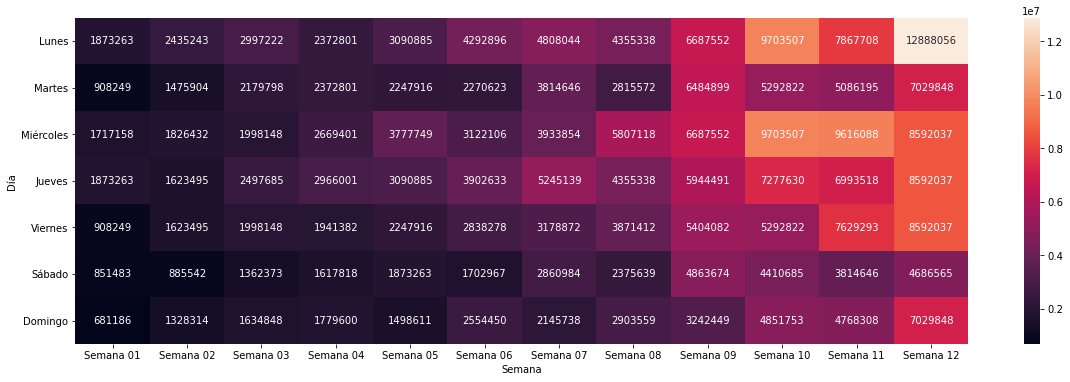

In [9]:
# Agrego anotaciones sobre cada celda
ax = sns.heatmap(df_video, annot=True, fmt="d", annot_kws={'size':10})

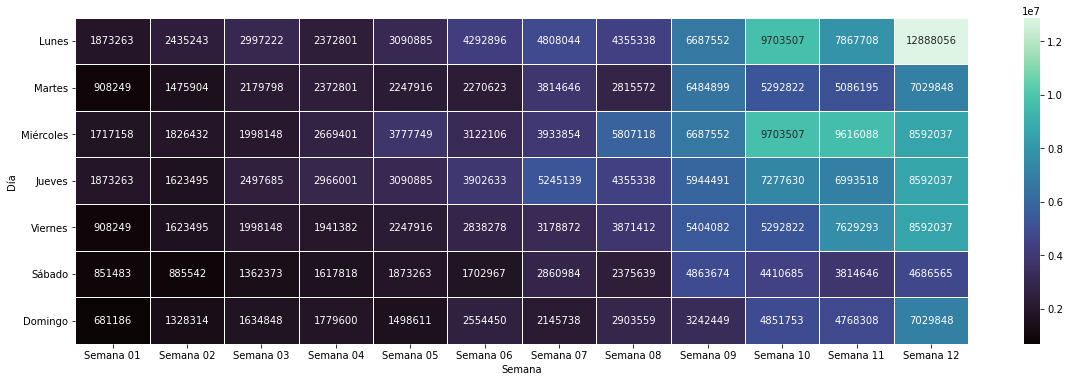

In [10]:
# Grafico con una paleta de colores secuencial
ax = sns.heatmap(df_video, annot=True, fmt="d", annot_kws={'size':10}, cmap='mako', linewidths=.5)

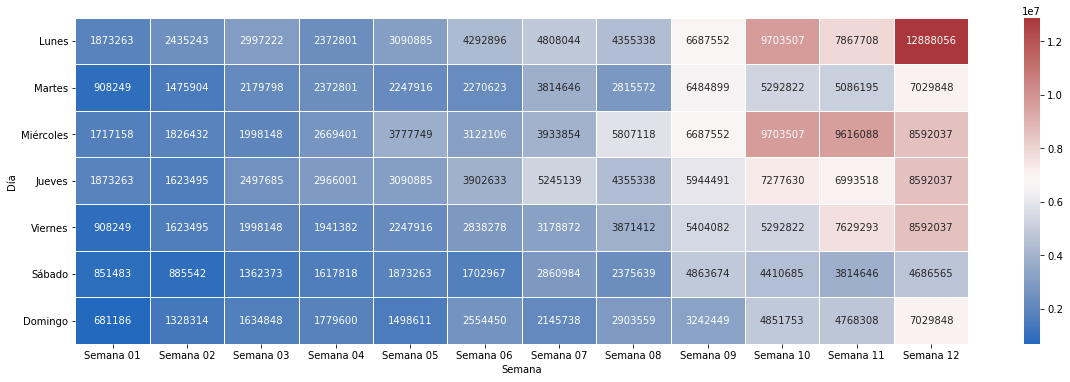

In [11]:
# Grafico con una paleta de colores divergente
ax = sns.heatmap(df_video, annot=True, fmt="d", annot_kws={'size':10}, cmap='vlag', linewidths=.5)

### La paleta secuencial es más efectiva en este caso, pues como todos los valores (horas) son positivas, se entiende mucho mejor que el uso de la plataforma ha aumentado con el correr de las semanas. Además se logra apreciar y diferenciar claramente los bloques de alta demanda de los de baja demanda.

### Caso 2

In [12]:
#Importo dataset que contiene datos del naufragio del Titanic y muestro los 5 primeros elementos
df_titanic = sns.load_dataset("titanic")
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
# Extraigo valores a utilizar después
df = df_titanic['class'].value_counts() 
df_vivos = df_titanic.loc[df_titanic['alive']=='yes']
df_muertos = df_titanic.loc[df_titanic['alive']=='no']
df_vivos_extracto = df_vivos['class'].value_counts() 
df_muertos_extracto = df_muertos['class'].value_counts() 

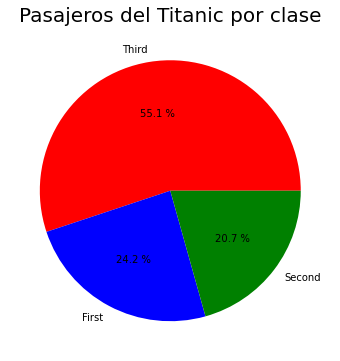

In [14]:
#Genero un gráfico de torta, agrego proporciones y cambio su color
fig = plt.figure(figsize=(6, 6))
plot = fig.add_subplot()
pie_plot = plot.pie(df, autopct="%0.1f %%", labels=df.index, colors=["red","blue","green"])
plot.set_title("Pasajeros del Titanic por clase",fontsize=20)
plt.show()

Text(0.5, 0.98, 'Pasajeros del Titanic por Supervivencia (0/1) y por Clase (T/F/S)')

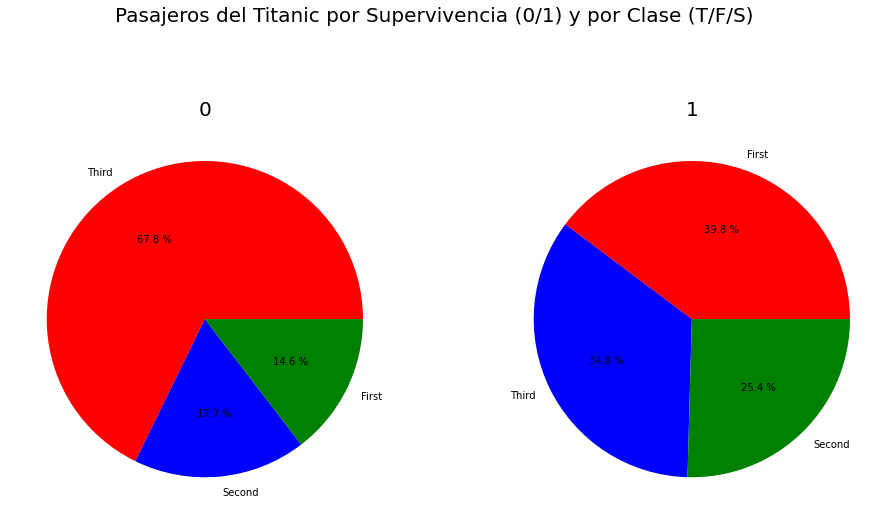

In [15]:
#Genero dos gráficos con la distribución de clases: uno con los que sobrevivieron y el otro con los que no.
fig = plt.figure(figsize=(16,16))
ax1 = plt.subplot2grid((2,2),(0,0))
ax1.set_title('0',fontsize=20)
plt.pie(df_muertos_extracto.values, autopct="%0.1f %%", labels=df_muertos_extracto.index, colors=("r","b","g"))
ax2 = plt.subplot2grid((2,2),(0,1))
ax2.set_title('1',fontsize=20)
plt.pie(df_vivos_extracto.values, autopct="%0.1f %%", labels=df_vivos_extracto.index, colors=("r","b","g"))
plt.suptitle('Pasajeros del Titanic por Supervivencia (0/1) y por Clase (T/F/S)',fontsize=20)

### a) De los sobrevivientes, la clase más común es la Primera Clase ("First"), con el 39,8%.

### b) De los no sobrevivientes, la clase más común es la Tercera Clase ("Third"), con el 67,8%.

### Caso 3

In [16]:
#Importo dataset que contiene datos sobre cantidad de peliculas estrenadas por género y muestro los 5 primeros elementos
df_cine = pd.read_csv("peliculas.csv", sep=",")
df_cine.head()

,género,año,cantidad
0,acción,2010,11
1,acción,2011,14
2,acción,2012,22
3,acción,2013,11
4,acción,2014,12


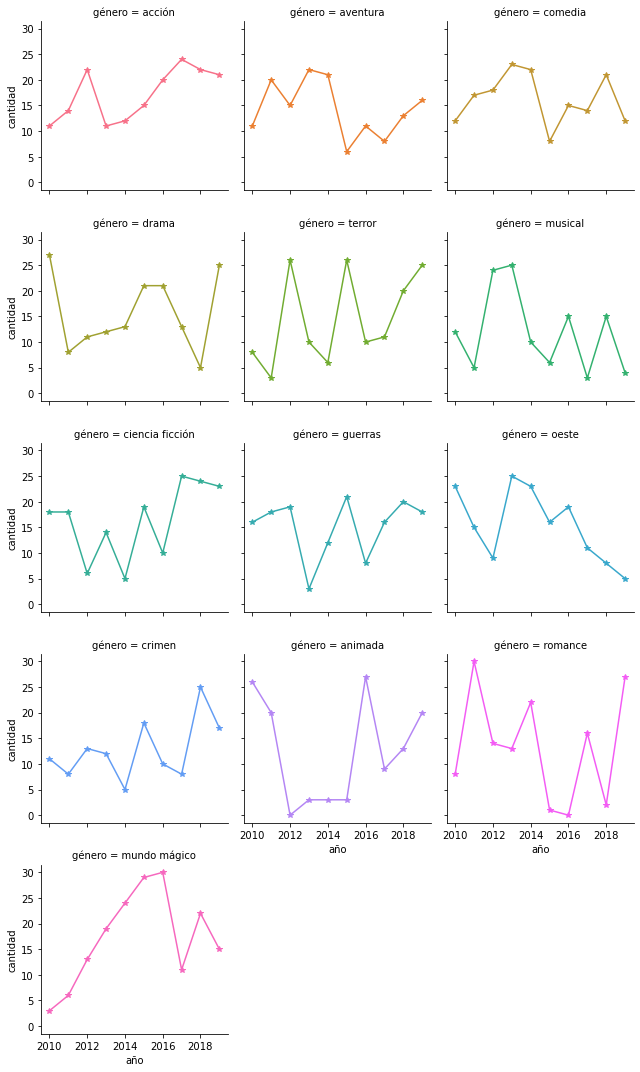

In [17]:
# Genero un gráfico small multiple de linea con categoría=género
grid = sns.FacetGrid(data=df_cine, col="género", hue="género", col_wrap=3)
grid.map(plt.plot, "año", "cantidad", marker="*")
plt.show()

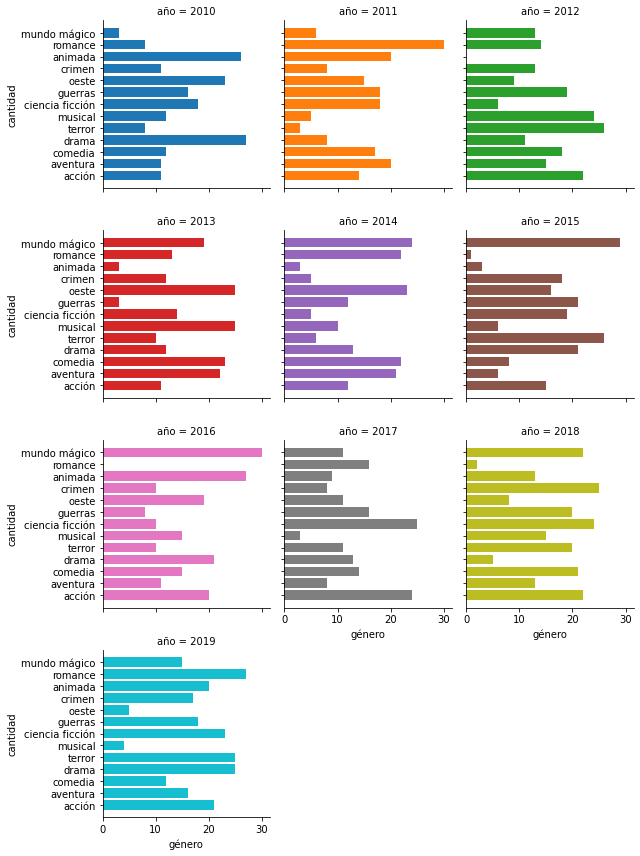

In [18]:
# Genero un gráfico small multiple de barra con categoría=año
grid = sns.FacetGrid(data=df_cine, col="año", hue="año", col_wrap=3)
grid.map(plt.barh, "género", "cantidad")
plt.show() 

### a) El gráfico que mejor permite comparar la tendencia de un género entre los diferentes años es el primero (small  multiple de linea), pues al separar en cada subplot un género y mostar su evolución temporal hacia la derecha, para el usuario es muy fácil captar rápdamente la tendencia a la baja, al alza o si se ha mantenido en el tiempo de manera aproximada, en cambio en el segundo gráfico el usuario tendría que comparar los 13 gráficos para encontrar tendencia para el género que desee comparar.

### b) El gráfico que mejor permite identificar el género de películas más estrenados en un año específico es el segundo (small  multiple de barra), pues al separar en cada subplot un año y mostar la frecuencia de cada género en ese año en particular, para el usuario es muy fácil captar rápdamente en ese año cual (es) género (s) es el qué más se estrenó, en cambio en el primer gráfico el usuario tendría que comparar los 13 gráficos para poder responder dicha pregunta.